In [4]:
import numpy as np
from IPython.display import Image

class Variable:
    def __init__(self, data):
        self.data = data

class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x) # 구체적인 계산은 forward 메서드에서 한다.
        output = Variable(y)
        return output
    
    def forward(self, x):
        raise NotImplementedError() # forward 메서드를 직접 호출한 사람에게 나타나는 예외. 이 메서드는 상속하여 구현해야 한다는 것을 알려준다.

class Square(Function):
    def forward(self, x):
        return x ** 2
    
class Exp(Function):
    def forward(self, x):
        return np.exp(x)

# STEP4 수치 미분

## 4.1 미분이란

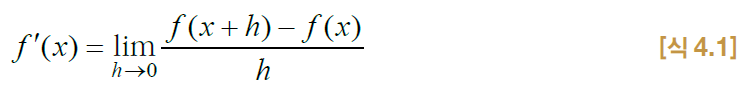

In [3]:
Image("../../밑바닥3 그림과 수식/식 4.1.png")

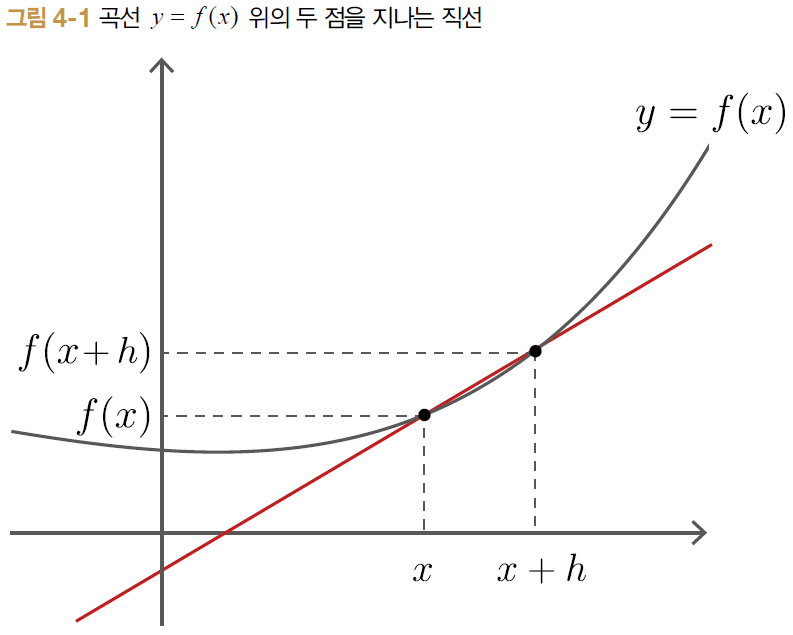

In [4]:
Image("../../밑바닥3 그림과 수식/그림 4-1.png")

[식 4.1]의 f'(x)는 f(x)의 도함수라고 한다.

## 4.2 수치 미분 구현
컴퓨터는 극한을 취급할 수 없으니 h를 0.0001과 같은 매우 작은 값을 이용하여 극한을 대체한다.  
이렇게 미세한 차이를 이용하여 함수의 변화량을 구하는 방법을 수치미분(numerical differentitation)이라고 한다.  

수치 미분은 작은 값을 사용하여 '진정한 미분'을 근사한다.   
따라서 값에 어쩔 수 없이 오차가 포함되는데, 이러한 오차를 줄이는 방법으로 '중앙차분(centered difference)'이라는 것이 있다.  
중앙차분은 f(x)와 f(x+h)의 차이를 구하는 것이 아닌, f(x-h)와 f(x+h)의 차이를 구한다.  
중앙차분에서 직선의 기울기: (f(x+h) - f(x-h)) / 2h (분모가 2h임에 주의!)

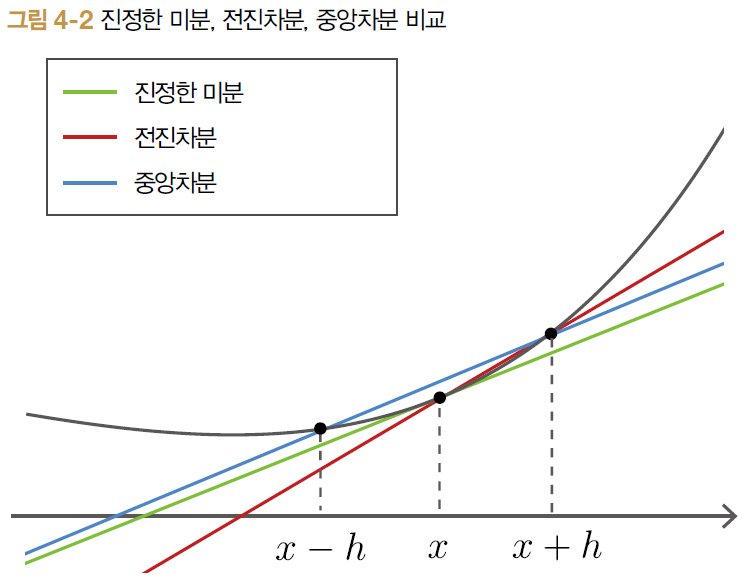

In [5]:
Image("../../밑바닥3 그림과 수식/그림 4-2.png")

직관적으로 보면 중앙차분이 진정한 미분과 비슷한 것을 알 수 있다.  

이제 중앙차분을 이용해서 수치 미분을 계산하는 함수를 numerical_diff(f, x, eps=1e-4) 라는 이름으로 구현해보자.

In [1]:
def numerical_diff(f, x, eps=1e-4):
    x0 = Variable(x.data - eps)
    x1 = Variable(x.data + eps)
    y0 = f(x0)
    y1 = f(x1)
    return (y1.data - y0.data) / (2 * eps)

In [3]:
f = Square()
x = Variable(np.array(2.0))
dy = numerical_diff(f, x)
print(dy)

4.000000000004


이렇게 함수 y = x^2에서 x=2.0일때의 수치 미분한 결과값을 구했다.  
오차가 없었다면 4.0이 나와야 하니 거의 올바르게 나왔다.

## 4.3 합성 함수의 미분
이어서 함성 함수를 미분해보자.

In [6]:
def f(x):
    A = Square()
    B = Exp()
    C = Square()
    return C(B(A(x)))

x = Variable(np.array(0.5))
dy = numerical_diff(f, x)
print(dy)

3.2974426293330694


이제 어떠한 함수도 미분할 수 있다!  
그러나 수치 미분에는 문제가 있다.

## 4.4 수치 미분의 문제점
수치 미분에는 오차가 포함되어 있다. 이 오차는 매우 작지만, 어떤 계산이냐에 따라 커질 수도 있다.  
더 심각한 문제는 수치 미분은 계산량이 많다는 것이다.  
변수가 여러 개인 계산을 미분할 경우 변수 각각을 미분해야 하기 때문이다.  
신경망에서는 매개변수를 수백만 개 이상 사용하는 것은 일도 아니므로 이 모두를 수치 미분으로 구하는 것은 현실적이지 않다.  
그래서 등장한 것이 역전파다.  

수치 미분은 구현하기 쉽고 거의 정확한 값을 얻을 수 있는 반면, 역전파는 복잡한 알고리즘이라 버그가 들어가기 쉽다.  
따라서 역전파를 정확하게 구현했는지 확인하기 위해 수치 미분의 결과를 이용하기도 하는데, 이를 '기울기 확인(gradient checking)'이라고 한다.  
기울기 확인은 10단계에서 구현한다.